In [3]:
from coniii import *

In [4]:
# Total Timeline T = 100
T = 500
# Number of neuros
N = 8

#Spike Apear Probability in Timeline 
Spikes_Probability = 0.1
#Number of Random Firing Timeline Points
N_tp = int(T * Spikes_Probability)
# Number of classify group
N_groups = 4

# Create Random Neuros Spikes Timeline (N_groups tpyes overall)
Random_NT = np.random.permutation(T)

# N_tp(10) random time points of firing for group i(overall is 4)
# Each Group Size is  (N_tp,1) contains the Random Firing Timeline Points
groups = []
for i in range(N_groups):
    start_index = i * N_tp
    end_index = (i + 1) * N_tp
    group = Random_NT[start_index:end_index]
    groups.append(group)

In [11]:
# Initializing Samples() to 0(8*10) and datatype
firing_rate = 0.8
samples = np.zeros((N,T), dtype = np.float32)

# Generate samples for each group
num_samples = int(N/N_groups)

for i, group in enumerate(groups):
    start_sample = int(num_samples * i)
    end_sample = int(num_samples * (i+1))
    samples[start_sample:end_sample, group] = (np.random.rand(num_samples, len(group)) < firing_rate)
    
# # Pick the Random Firing Timeline Points(set 2 * 10 ) in the Whole Samples
# # Use Bool to Control the T/F (1/0)
# samples[: int(N/N_groups), groups[0]] = (np.random.rand(int(N/N_groups),len(groups[0])) < firing_rate)
# samples[: int(N/N_groups), groups[1]] = (np.random.rand(int(N/N_groups),len(groups[1])) < firing_rate)
# samples[: int(N/N_groups), groups[2]] = (np.random.rand(int(N/N_groups),len(groups[2])) < firing_rate)
# samples[: int(N/N_groups), groups[3]] = (np.random.rand(int(N/N_groups),len(groups[3])) < firing_rate)

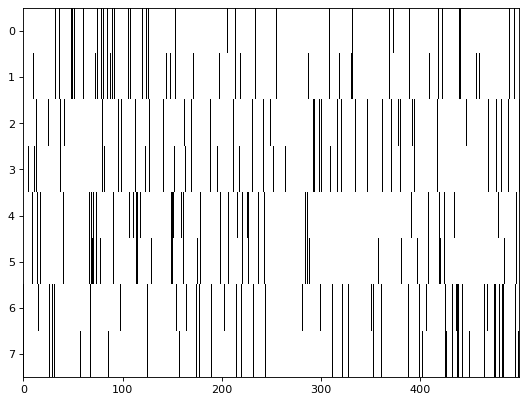

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(samples, aspect="auto", cmap="gray_r", interpolation="none")

In [14]:
from coniii.utils import define_ising_helper_functions
from coniii import ClusterExpansion, pair_corr

import matplotlib.pyplot as plt
import numpy as np

In [15]:
calc_e, calc_observables, mchApproximation = define_ising_helper_functions()

In [31]:
samples.shape

(8, 500)

In [48]:
# Declare and call solver.
samples[samples == 0] = -1
solver = ClusterExpansion(samples.T)

multipliers, ent, clusters, deltaSdict, deltaJdict= solver.solve(threshold=1e-1, full_output=True)

C:\Users\Riickyyy\anaconda3\envs\coniii\lib\site-packages\coniii\solvers.py:96: UserWarning: Assuming that calc_observables should be for Ising model.
  if iprint: warn("Assuming that calc_observables should be for Ising model.")
C:\Users\Riickyyy\anaconda3\envs\coniii\lib\site-packages\coniii\samplers.py:1187: UserWarning: Boost C++ implementation not available. Defaulting to slower sampling methods.
  warn("Boost C++ implementation not available. Defaulting to slower sampling methods.")


adaptiveClusterExpansion: Clusters of size 2
adaptiveClusterExpansion: Clusters of size 3


In [52]:
multipliers[8:].shape

(28,)

TypeError: Invalid shape (36,) for image data

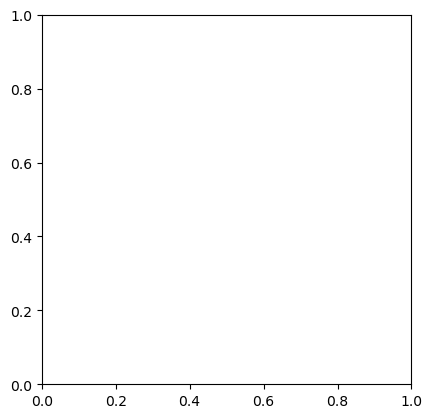

In [41]:
plt.imshow(multipliers, cmap = "gray_r")
plt.colorbar()